#### **Decision Tree From Scratch**

**Introduction**

A **decision tree** is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Futhermore, decision trees is a **non-parametric**, which are methods such as linear & logisitic regression assumptions have been violated for some reason and an alternative method for analysis. It is a **supervised learning** approach used for classification and regression applications. Decision trees are constructed using a top-down, greedy approach, where each split is chosen to maximize information gain or minimize impurity at the current node. This may not always result in the globally optimal tree.

*Components:*
* **Root Node**: Represents the entire dataset and the initial decision to be made.
* **Internal Nodes**: Represent decisions or tests on attributes. Each internal node has one or more branches.
* **Branches**: Represent the outcome of a decision or test, leading to another node.
* **Leaf Nodes**: Represent the final decision or prediction. No further splits occur at these nodes.
* **Pruning**: The process of removing or cutting down specific nodes in a decision tree to prevent overfitting and simplify the model.

**Assumptions**

* **Binary Splits**: Decision trees typically make binary splits, meaning each node divides the data into two subsets based on a single feature or condition. This assumes that each decision can be represented as a binary choice.
* **Recursive Partitioning**: Decision trees use a recursive partitioning process, where each node is divided into child nodes, and this process continues until a stopping criterion is met. This assumes that data can be effectively subdivided into smaller, more manageable subsets.
* **Feature Types**: Decision trees can handle both categorical and numerical features. However, they may require different splitting strategies for each type.
* **Overfitting**: Decision trees are **prone to overfitting** when they capture noise in the data. Pruning and setting appropriate stopping criteria are used to address this assumption.
* **No Missing Values & Outliers**: Decision trees assume that there are no missing values in the dataset or that missing values have been appropriately handled through imputation or other methods. Decision trees are sensitive to outliers, and extreme values can influence their construction. Preprocessing or robust methods may be needed to handle outliers effectively.
* **Sample Size**: Small datasets may lead to overfitting, and large datasets may result in overly complex trees. The sample size and tree depth should be balanced.

**Goal**

The Goal of this excerise is to implement the alogrithim from scratch without using any frameworks.

**Motivation**

As for the motivation, these kind of excerises are good for any data science interview preperation as you are able to get the fundementals down. Understand how the algorithim works and not treating it like a black box function will help you become a better data scientist.

**Python Implementation From Scratch**

In [8]:
import numpy as np # math
import pandas as pd # dataframe
import matplotlib.pyplot as plt # plot

In [6]:
mydf = pd.read_csv("/kaggle/input/mountains-vs-beaches-preference/mountains_vs_beaches_preferences.csv")

For simplicity, we will be choosing these following variables for our model creation. 
- `Age`: Age of the individual (numerical).
- `Travel_Frequency`: Number of vacations taken per year 
- `Vacation_Budget`: The individual's budget when going on vacation.
- `Pets`: Indicates whether the individual owns pets (binary: 0 = No, 1 = Yes).

Given the fact that decision trees are prone to overfitting, let's just keep our features to the minimum and simple. Random forest can be a good alternative in most cases when your data is more complex. 

*NOTE: Generally, having domain knowledge about your data is important to choose the right features if you have loads to feature to choose from. That being said, there are many use cases in using feature selection techniques to accomplish this.*

In [7]:
mydf = mydf[["Age","Travel_Frequency","Vacation_Budget","Pets","Preference"]]
mydf.head(n = 10)

,Age,Travel_Frequency,Vacation_Budget,Pets,Preference
0,56,9,2477,0,1
1,69,1,4777,0,0
2,46,0,1469,0,1
3,32,6,1482,1,1
4,60,5,516,1,0
5,25,3,2895,0,0
6,38,1,4994,0,0
7,56,8,3656,1,0
8,36,6,2408,1,0
9,40,1,4044,1,0


In [12]:
mydf.describe()

,Age,Travel_Frequency,Vacation_Budget,Pets,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,4.489265,2741.799062,0.500858,0.250706
std,14.985597,2.876130,1296.922423,0.500004,0.433423
min,18.000000,0.000000,500.000000,0.000000,0.000000
25%,31.000000,2.000000,1622.000000,0.000000,0.000000
50%,43.000000,4.000000,2733.000000,1.000000,0.000000
75%,56.000000,7.000000,3869.000000,1.000000,1.000000
max,69.000000,9.000000,4999.000000,1.000000,1.000000


In [16]:
mydf.isnull().sum()

Age                 0
Travel_Frequency    0
Vacation_Budget     0
Pets                0
Preference          0
dtype: int64

#### **Understanding: `Age`**

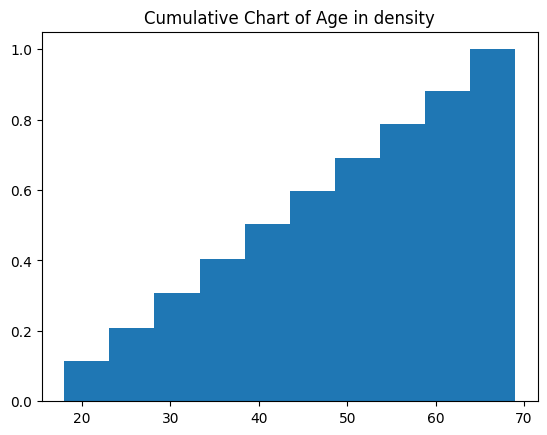

In [79]:
plt.hist(mydf["Age"],cumulative = True, density = True)
plt.title("Cumulative Chart of Age in density")
plt.xlabel("Age")
plt.show()

In [26]:
mydf["Age"].value_counts(bins = 10).sort_index()

(17.948, 23.1]    5963
(23.1, 28.2]      4991
(28.2, 33.3]      5132
(33.3, 38.4]      5110
(38.4, 43.5]      5154
(43.5, 48.6]      5039
(48.6, 53.7]      4909
(53.7, 58.8]      5051
(58.8, 63.9]      4941
(63.9, 69.0]      6154
Name: count, dtype: int64

#### **Understanding: `Vacation_Budget`**

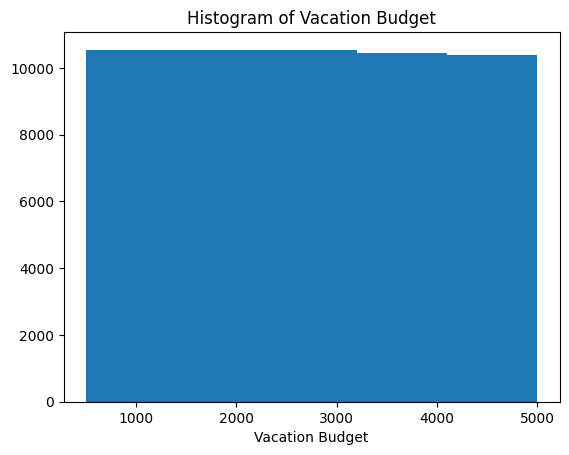

In [80]:
plt.hist(mydf["Vacation_Budget"],bins = 5)
plt.xlabel("Vacation Budget")
plt.ylabel("Count")
plt.title("Histogram of Vacation Budget")
plt.show()

#### **Understanding: `Pets`**

In [ ]:
count = mydf["Pets"].value_counts().sort_index()

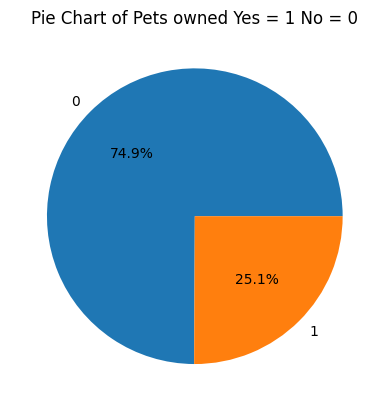

In [81]:
plt.pie(count, labels = count.index,autopct='%1.1f%%')
plt.title("Pie Chart of Pets owned Yes = 1 No = 0")
plt.show()

#### **Understanding: `Travel_Frequency`**

In [60]:
mydf["Travel_Frequency"].value_counts().sort_index()

Travel_Frequency
0    5259
1    5342
2    5271
3    5138
4    5280
5    5332
6    5203
7    5097
8    5238
9    5284
Name: count, dtype: int64

#### **Understanding: `Preference`**

In [44]:
count = mydf["Preference"].value_counts().sort_index()

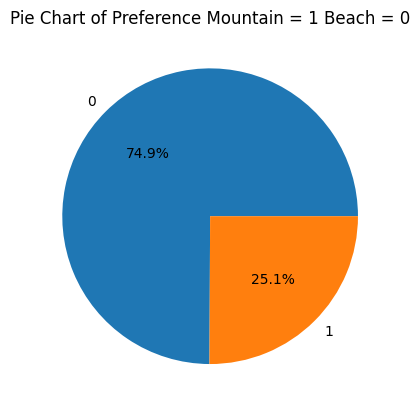

In [82]:
plt.pie(count,labels = count.index,autopct='%1.1f%%') # We can see 75% prefer mountain
plt.title("Pie Chart of Preference Mountain = 1 Beach = 0")
plt.show()

#### **Understanding: `Pets`, `Vacation_Budget`,`Travel_Frequency`, `Age` vs `Preference`**


Before implementing our Decision Tree, I would like to get a superficial understanding/insights on the following relationships:
* `Vacation_Budget` vs `Preference`
* `Age` vs `Preference`

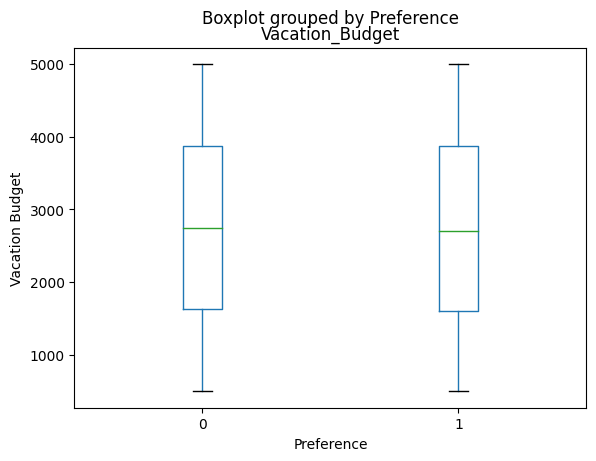

In [62]:
mydf.boxplot(column = "Vacation_Budget", by = "Preference")
plt.xlabel("Preference")
plt.ylabel("Vacation Budget")
plt.grid(False)

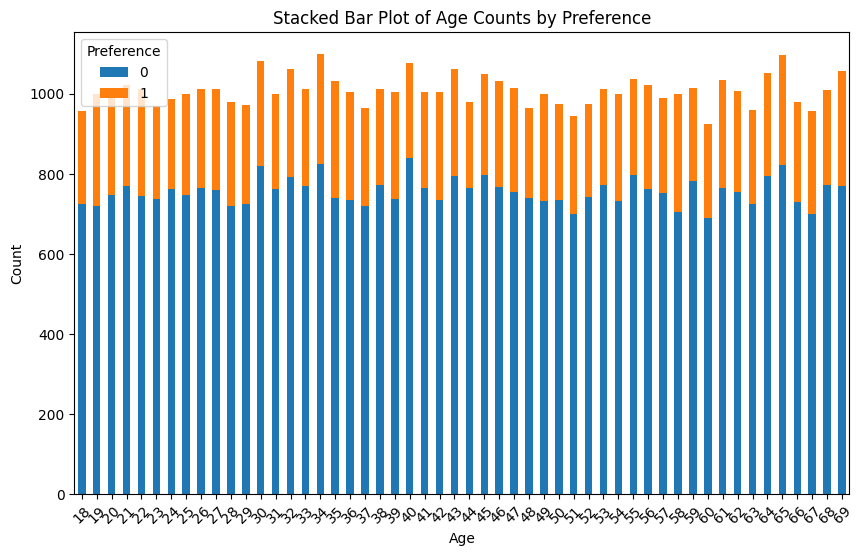

In [77]:
pivot_df = mydf.groupby(['Age', 'Preference']).size().unstack(fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Age Counts by Preference')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(title='Preference')
plt.grid(False)
plt.show()

### **Model Building - Decision Tree**

#### **Decision Tree Using Sklearn**

In [114]:
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [95]:
X_data = mydf[["Age","Travel_Frequency","Vacation_Budget","Pets"]]
Y_target = mydf[["Preference"]]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target, random_state=42, test_size=0.2)

(10489, 1)

In [111]:
def train_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth = 5)
    clf_gini.fit(X_train,y_train)
    return clf_gini

In [112]:
def train_entropy(X_train,y_train):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 42,max_depth = 5)
    clf_entropy.fit(X_train,y_train)
    return clf_entropy

In [107]:
def prediction(X_test,clf):
    y_pred = clf.predict(X_test)
    return y_pred

In [122]:
def accuracy(y_test, pred):
     print("Accuracy : ",accuracy_score(y_test, pred)*100)

In [118]:
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

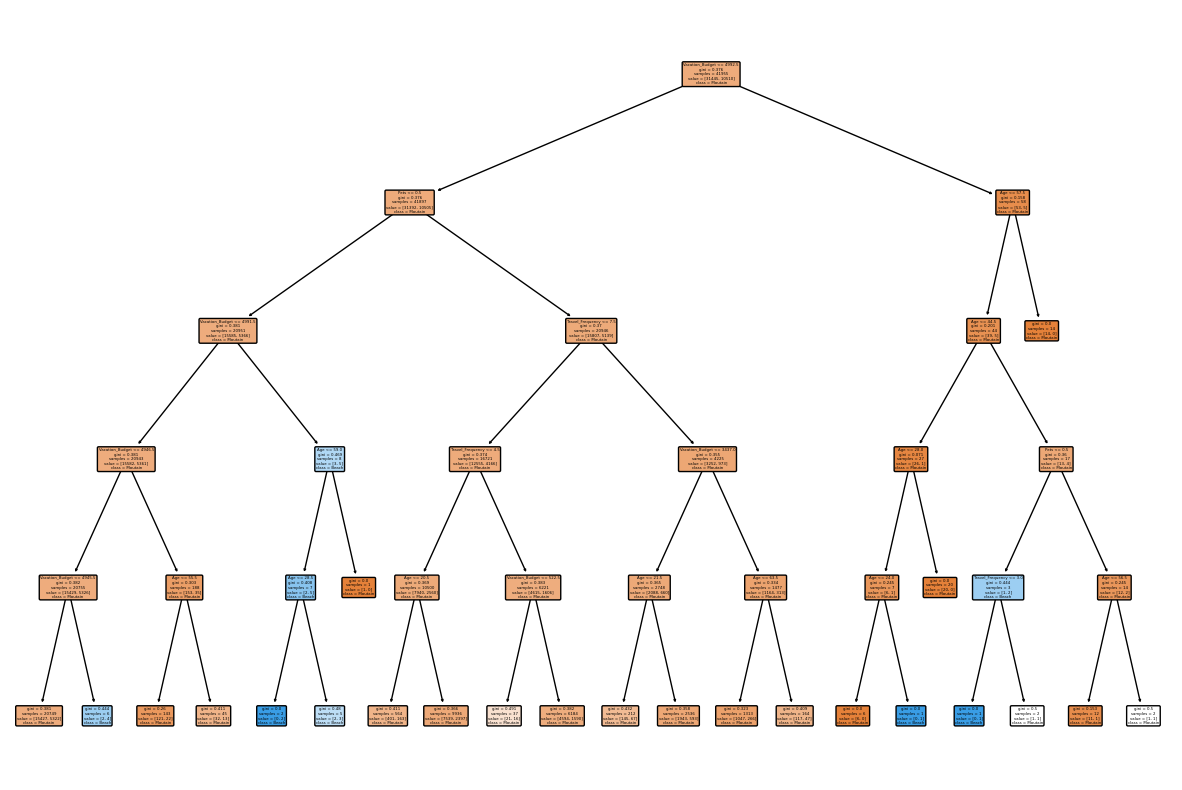

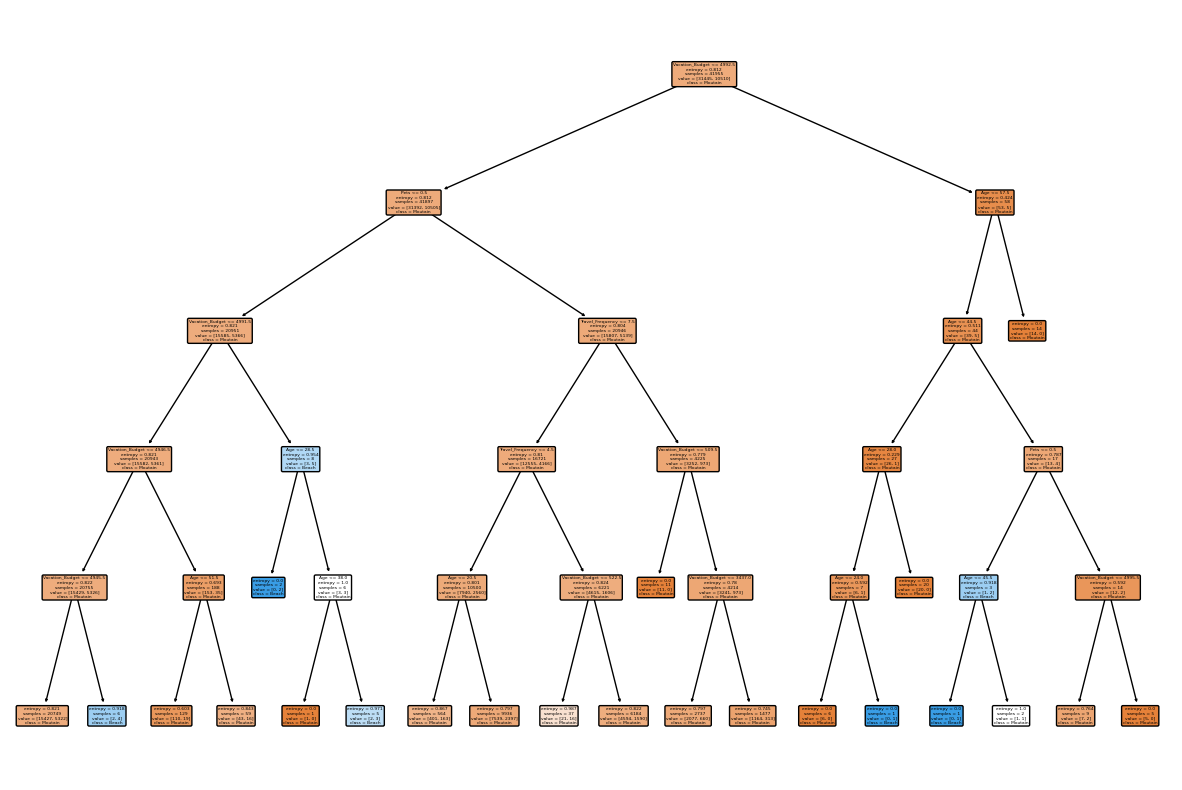

In [120]:
clf_gini = train_gini(X_train,y_train)
clf_entropy = train_entropy(X_train,y_train)

plot_decision_tree(clf_gini, ["Age","Travel_Frequency","Vacation_Budget","Pets"], ["Moutain","Beach"])
plot_decision_tree(clf_entropy, ["Age","Travel_Frequency","Vacation_Budget","Pets"], ["Moutain","Beach"])

In [125]:
pred_gini = prediction(X_test,clf_gini)
pred_entropy = prediction(X_test,clf_entropy)
accuracy(y_test,pred_gini)
accuracy(y_test,pred_entropy)

Accuracy :  74.84030889503289
Accuracy :  74.84984269234435


#### **Decision Tree From Scratch**